# **Práctico 1: Introducción a la minería de texto**
Prof. Carlos Toro, 2025

carlos.toro.ing@gmail.com, ctoron@docente.uss.cl

Nombre Alumno(s):

## **0. Repaso de algunos conceptos útiles de python**

Antes de usar librerías avanzadas como
NLTK o Scikit-learn, revisemos herramientas que Python ya trae para trabajar con texto:

A. Métodos básicos de strings (cadenas de texto).

B. Cómo convertir texto en listas de palabras (`split`).

C. Cómo unir listas de palabras para formar texto (`join`).

D. La poderosa técnica de "Comprensión de Listas" para procesar datos.

E. El uso de Expresiones Regulares (RegEx) para una limpieza avanzada.

### **A) Algo de strings**

Un string (o cadena de texto) es simplemente una secuencia de caracteres. Python nos da muchos métodos útiles para manipularlos.


In [1]:


# Texto de ejemplo
texto_original = "  El rápido zorro marrón SALTA sobre el perro perezoso.  "
print(f"Texto Original: '{texto_original}'")

# --- .lower() y .upper() ---
# Convierten todo el texto a minúsculas o mayúsculas. Fundamental para normalizar.
texto_minusculas = texto_original.lower()
print(f"\nEn minúsculas (.lower()): '{texto_minusculas}'")

texto_mayusculas = texto_original.upper()
print(f"En mayúsculas (.upper()): '{texto_mayusculas}'")

# --- .strip() ---
# Elimina espacios en blanco (o caracteres especificados) al inicio y al final.
texto_sin_espacios = texto_original.strip()
print(f"\nSin espacios extra (.strip()): '{texto_sin_espacios}'")

# --- .replace(viejo, nuevo) ---
# Reemplaza todas las ocurrencias de una sub-cadena por otra.
texto_reemplazado = texto_sin_espacios.replace("perro", "gato")
print(f"Reemplazando palabras (.replace()): '{texto_reemplazado}'")

Texto Original: '  El rápido zorro marrón SALTA sobre el perro perezoso.  '

En minúsculas (.lower()): '  el rápido zorro marrón salta sobre el perro perezoso.  '
En mayúsculas (.upper()): '  EL RÁPIDO ZORRO MARRÓN SALTA SOBRE EL PERRO PEREZOSO.  '

Sin espacios extra (.strip()): 'El rápido zorro marrón SALTA sobre el perro perezoso.'
Reemplazando palabras (.replace()): 'El rápido zorro marrón SALTA sobre el gato perezoso.'


### **B) Texto a listas**

La tarea más común en NLP es la **tokenización**: dividir un texto en sus palabras o "tokens". El método `.split()` es la forma más simple de hacerlo.


In [2]:
oracion = "El análisis de texto es una habilidad fundamental."

# Por defecto, .split() divide el texto por los espacios en blanco.
lista_de_palabras = oracion.split()
print(f"Oración original: '{oracion}'")
print(f"Resultado de .split(): {lista_de_palabras}")
print(f"El tipo de dato es: {type(lista_de_palabras)}")

# También podemos dividir por un carácter específico.
datos_csv = "nombre,apellido,ciudad,edad"
lista_de_datos = datos_csv.split(',')
print(f"\nDatos CSV: '{datos_csv}'")
print(f"Resultado de .split(','): {lista_de_datos}")

Oración original: 'El análisis de texto es una habilidad fundamental.'
Resultado de .split(): ['El', 'análisis', 'de', 'texto', 'es', 'una', 'habilidad', 'fundamental.']
El tipo de dato es: <class 'list'>

Datos CSV: 'nombre,apellido,ciudad,edad'
Resultado de .split(','): ['nombre', 'apellido', 'ciudad', 'edad']


### **C) Listas a string**

A veces, después de procesar una lista de palabras (ej. eliminar algunas), queremos volver a unirlas en una sola cadena de texto. Para eso usamos `.join()`.
La sintaxis es un poco particular: `separador.join(lista)`.

In [3]:
tokens = ['el', 'análisis', 'de', 'texto', 'es', 'fundamental']
print(f"Lista de tokens original: {tokens}")

Lista de tokens original: ['el', 'análisis', 'de', 'texto', 'es', 'fundamental']


In [4]:
# Unimos la lista usando un espacio como separador
texto_unido = " ".join(tokens)
print(f"\nResultado de ' '.join(lista): '{texto_unido}'")
print(f"El tipo de dato es: {type(texto_unido)}")

# Podemos usar cualquier separador
texto_con_guiones = "-".join(tokens)
print(f"Resultado de '-'.join(lista): '{texto_con_guiones}'")


Resultado de ' '.join(lista): 'el análisis de texto es fundamental'
El tipo de dato es: <class 'str'>
Resultado de '-'.join(lista): 'el-análisis-de-texto-es-fundamental'


### **D) Comprensión de Listas**

La comprensión de listas (list comprehensions) es una forma muy "pythónica" y eficiente de crear una lista a partir de otra. Es una de las herramientas más útiles para el pre-procesamiento de texto.

In [5]:
# --- Ejemplo Básico: Aplicar una operación a cada elemento ---

palabras = ['hola', 'mundo', 'python']
print(f"Lista original: {palabras}")

# Forma tradicional con un bucle for:
mayusculas_for = []
for palabra in palabras:
    mayusculas_for.append(palabra.upper())
print(f"Con bucle 'for': {mayusculas_for}")

Lista original: ['hola', 'mundo', 'python']
Con bucle 'for': ['HOLA', 'MUNDO', 'PYTHON']


In [6]:
# Forma con comprensión de listas: [operación for elemento in lista]
mayusculas_comp = [palabra.upper() for palabra in palabras]
print(f"Con comprensión de listas: {mayusculas_comp}")

Con comprensión de listas: ['HOLA', 'MUNDO', 'PYTHON']


También podemos añadir condiciones para filtrar elementos:

In [7]:
numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(f"\nLista de números: {numeros}")

# Forma con comprensión de listas: [operación for elemento in lista if condición]
# Queremos solo los cuadrados de los números pares.
cuadrados_pares = [n**2 for n in numeros if n % 2 == 0]
print(f"Cuadrados de los números pares: {cuadrados_pares}")



Lista de números: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Cuadrados de los números pares: [4, 16, 36, 64, 100]


### **E) Expresiones regulares**

Las expresiones regulares son secuencias de carcateres que permiten establecer patrones de búsqueda. Se utilizan en el procesamiento de texto para la identificación de palabras similares y en Python se utilizan llamando el paquete re.

In [8]:
import re

In [9]:
help(re)

Help on package re:

NAME
    re - Support for regular expressions (RE).

MODULE REFERENCE
    https://docs.python.org/3.11/library/re.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides regular expression matching operations similar to
    those found in Perl.  It supports both 8-bit and Unicode strings; both
    the pattern and the strings being processed can contain null bytes and
    characters outside the US ASCII range.
    
    Regular expressions can contain both special and ordinary characters.
    Most ordinary characters, like "A", "a", or "0", are the simplest
    regular expressions; they simply match themselves.  You can
    concatenate ordinary characters, so l

Ej.: El patrón `r'[^a-záéíóúñ\s]'` significa:
* `r''` -> Raw string (buena práctica para RegEx)
* `[]` -> Un conjunto de caracteres
* `^`  -> Negación (encuentra cualquier cosa que NO esté en el conjunto)
*` a-z...` -> Rango de letras, incluyendo las de español
* `\s `-> Cualquier espacio en blanco (espacio, tab, nueva línea)

En resumen: "Encuentra cualquier carácter que NO sea una letra minúscula en español o un espacio".

In [10]:
texto_con_ruido = "Aquí tenemos un texto con #hashtags, números como 12345, y puntuación... ¡Mucha!"
print(f"Texto con ruido: '{texto_con_ruido}'")

Texto con ruido: 'Aquí tenemos un texto con #hashtags, números como 12345, y puntuación... ¡Mucha!'


In [11]:
texto_limpiado_regex = re.sub(r'[^a-záéíóúñ\s]', '', texto_con_ruido.lower())
print(f"\nTexto limpiado con re.sub(): '{texto_limpiado_regex}'")


Texto limpiado con re.sub(): 'aquí tenemos un texto con hashtags números como  y puntuación mucha'


`re.findall(patrón, texto)`

Encuentra TODAS las ocurrencias de un patrón y las devuelve en una lista.
El patrón `r'\w+'` encuentra secuencias de uno o más caracteres de palabra (letras, números, guion bajo).
Es una forma más robusta de tokenizar que `.split()` porque maneja la puntuación de forma implícita.

In [12]:
tokens_regex = re.findall(r'\w+', texto_con_ruido.lower())
print(f"Tokens extraídos con re.findall(): {tokens_regex}")

Tokens extraídos con re.findall(): ['aquí', 'tenemos', 'un', 'texto', 'con', 'hashtags', 'números', 'como', '12345', 'y', 'puntuación', 'mucha']


Ejemplo práctico para procesamiento de texto:

In [13]:
# Texto original
texto_sucio = "Este es un TEXTO de 123 ejemplo, con algunas palabras que no queremos, como 'un' o 'de'."
print(f"Texto original: {texto_sucio}\n")
# Convertimos a minúsculas
texto_minusculas = texto_sucio.lower()

# Usamos RegEx para eliminar todo lo que no sean letras o espacios
texto_solo_letras = re.sub(r'[^a-záéíóúñ\s]', '', texto_minusculas)
print(f"Paso intermedio (solo letras y espacios): '{texto_solo_letras}'")

# Tokenizamos el texto ya limpio
tokens = texto_solo_letras.split()
print(f"\nTokens iniciales: {tokens}")

# Lista de palabras a eliminar (stopwords)
stopwords = ['un', 'de', 'con', 'que', 'es', 'o']

# Usamos una comprensión de listas para filtrar las stopwords
tokens_limpios = [token for token in tokens if token not in stopwords]

# Volvemos a unir todo en un texto limpio.
texto_final_limpio = " ".join(tokens_limpios)

print(f"\nTokens finales limpios: {tokens_limpios}")
print(f"Texto final limpio: '{texto_final_limpio}'")



Texto original: Este es un TEXTO de 123 ejemplo, con algunas palabras que no queremos, como 'un' o 'de'.

Paso intermedio (solo letras y espacios): 'este es un texto de  ejemplo con algunas palabras que no queremos como un o de'

Tokens iniciales: ['este', 'es', 'un', 'texto', 'de', 'ejemplo', 'con', 'algunas', 'palabras', 'que', 'no', 'queremos', 'como', 'un', 'o', 'de']

Tokens finales limpios: ['este', 'texto', 'ejemplo', 'algunas', 'palabras', 'no', 'queremos', 'como']
Texto final limpio: 'este texto ejemplo algunas palabras no queremos como'


Con unas pocas líneas y usando usando herramientas de python tradicionales, hemos realizado un pipeline de limpieza de texto completo. Dominar `split`, `join`, `RegEx` y la comprensión de listas es un gran porcentaje del trabajo en muchas tareas de pre-procesamiento.


## **1. Herramientas para manejo de texto**

Veamos algunas librerías y herramientas tradicionales para trabajar con texto

### **A) NLTK**

Primero importemos y descarguemos las componentes que usaremos

In [14]:
import scipy
import nltk
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.book import *

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


El código anterior, entre otras cosas, descarga 9 textos de muestra:

* **text1**: Moby Dick by Herman Melville 1851
* **text2**: Sense and Sensibility by Jane Austen 1811
* **text3**: The Book of Genesis
* **text4**: Inaugural Address Corpus
* **text5**: Chat Corpus
* **text6**: Monty Python and the Holy Grail
* **text7**: Wall Street Journal
* **text8**: Personals Corpus
* **text9**: The Man Who Was Thursday by G . K . Chesterton 1908

Cada uno de esos textos es un objeto de NLTK de tipo "Text", que implementa diversas funcionalidades útiles para visualización.
Para crear tu propio objeto tipo "Text" basta con crearlo a partir de cualquier texto tokenizado. A continuación un ejemplo tomado de la página de Wikipedia de Cristóbal Colón.

In [15]:
columbus_tokenized = ['Christopher', 'Columbus', '(', 'between', '25', 'August', 'and', '31', 'October', '1451', '–', '20', 'May', '1506', ')', 'was', 'an', 'Italian', 'explorer', 'and', 'navigator', 'who', 'completed', 'four', 'voyages', 'across', 'the', 'Atlantic', 'Ocean', ',', 'opening', 'the', 'way', 'for', 'European', 'exploration', 'and', 'colonization', 'of', 'the', 'Americas', '.', 'His', 'expeditions', ',', 'sponsored', 'by', 'the', 'Catholic', 'Monarchs', 'of', 'Spain', ',', 'were', 'the', 'first', 'European', 'contact', 'with', 'the', 'Caribbean', ',', 'Central', 'America', ',', 'and', 'South', 'America', '.', 'Scholars', 'generally', 'agree', 'that', 'Columbus', 'was', 'born', 'in', 'the', 'Republic', 'of', 'Genoa', 'and', 'spoke', 'a', 'dialect', 'of', 'Ligurian', 'as', 'his', 'first', 'language', '.', 'He', 'went', 'to', 'sea', 'at', 'a', 'young', 'age', 'and', 'travelled', 'widely', ',', 'as', 'far', 'north', 'as', 'the', 'British', 'Isles', 'and', 'as', 'far', 'south', 'as', 'what', 'is', 'now', 'Ghana', '.', 'He', 'married', 'Portuguese', 'noblewoman', 'Filipa', 'Moniz', 'Perestrelo', 'and', 'was', 'based', 'in', 'Lisbon', 'for', 'several', 'years', ',', 'but', 'later', 'took', 'a', 'Castilian', 'mistress', ';', 'he', 'had', 'one', 'son', 'with', 'each', 'woman', '.', 'Though', 'largely', 'self-educated', ',', 'Columbus', 'was', 'widely', 'read', 'in', 'geography', ',', 'astronomy', ',', 'and', 'history', '.', 'He', 'formulated', 'a', 'plan', 'to', 'seek', 'a', 'western', 'sea', 'passage', 'to', 'the', 'East', 'Indies', ',', 'hoping', 'to', 'profit', 'from', 'the', 'lucrative', 'spice', 'trade', '.', 'Following', 'Columbus', "'s", 'persistent', 'lobbying', 'to', 'multiple', 'kingdoms', ',', 'Catholic', 'Monarchs', 'Queen', 'Isabella', 'I', 'and', 'King', 'Ferdinand', 'II', 'agreed', 'to', 'sponsor', 'a', 'journey', 'west', '.', 'Columbus', 'left', 'Castile', 'in', 'August', '1492', 'with', 'three', 'ships', ',', 'and', 'made', 'landfall', 'in', 'the', 'Americas', 'on', '12', 'October', '(', 'ending', 'the', 'period', 'of', 'human', 'habitation', 'in', 'the', 'Americas', 'now', 'referred', 'to', 'as', 'the', 'pre-Columbian', 'era', ')', '.', 'His', 'landing', 'place', 'was', 'an', 'island', 'in', 'the', 'Bahamas', ',', 'known', 'by', 'its', 'native', 'inhabitants', 'as', 'Guanahani', ';', 'its', 'exact', 'location', 'is', 'uncertain', '.', 'Columbus', 'subsequently', 'visited', 'the', 'islands', 'now', 'known', 'as', 'Cuba', 'and', 'Hispaniola', ',', 'establishing', 'a', 'colony', 'in', 'what', 'is', 'now', 'Haiti', ':', 'the', 'first', 'European', 'settlement', 'in', 'the', 'Americas', 'since', 'the', 'Norse', 'colonies', 'nearly', '500', 'years', 'earlier', '.', 'He', 'arrived', 'back', 'in', 'Castile', 'in', 'early', '1493', ',', 'bringing', 'a', 'number', 'of', 'captive', 'natives', 'with', 'him', '.', 'Word', 'of', 'his', 'voyages', 'soon', 'spread', 'throughout', 'Europe', '.', 'Columbus', 'made', 'three', 'further', 'voyages', 'to', 'the', 'New', 'World', ',', 'exploring', 'the', 'Lesser', 'Antilles', 'in', '1493', ',', 'Trinidad', 'and', 'the', 'northern', 'coast', 'of', 'South', 'America', 'in', '1498', ',', 'and', 'the', 'eastern', 'coast', 'of', 'Central', 'America', 'in', '1502', '.', 'Many', 'of', 'the', 'names', 'he', 'gave', 'to', 'geographical', 'features—particularly', 'islands—are', 'still', 'in', 'use', '.', 'He', 'continued', 'to', 'seek', 'a', 'passage', 'to', 'the', 'East', 'Indies', ',', 'and', 'the', 'extent', 'to', 'which', 'he', 'was', 'aware', 'that', 'the', 'Americas', 'were', 'a', 'wholly', 'separate', 'landmass', 'is', 'uncertain', '.', 'He', 'never', 'clearly', 'renounced', 'his', 'belief', 'that', 'he', 'had', 'reached', 'the', 'Far', 'East', 'and', 'gave', 'the', 'name', 'indios', '(', '``', 'Indians', "''", ')', 'to', 'the', 'indigenous', 'peoples', 'he', 'encountered', '.', 'As', 'a', 'colonial', 'governor', ',', 'Columbus', 'was', 'accused', 'by', 'his', 'contemporaries', 'of', 'significant', 'brutality', 'and', 'was', 'soon', 'removed', 'from', 'the', 'post', '.', 'Columbus', "'s", 'strained', 'relationship', 'with', 'the', 'Crown', 'of', 'Castile', 'and', 'its', 'appointed', 'colonial', 'administrators', 'in', 'America', 'led', 'to', 'his', 'arrest', 'and', 'removal', 'from', 'Hispaniola', 'in', '1500', ',', 'and', 'later', 'to', 'protracted', 'litigation', 'over', 'the', 'benefits', 'that', 'he', 'and', 'his', 'heirs', 'claimed', 'were', 'owed', 'to', 'them', 'by', 'the', 'crown', '.', 'Columbus', "'s", 'expeditions', 'inaugurated', 'a', 'period', 'of', 'exploration', ',', 'conquest', ',', 'and', 'colonization', 'that', 'lasted', 'for', 'centuries', ',', 'helping', 'create', 'the', 'modern', 'Western', 'world', '.', 'The', 'transfers', 'between', 'the', 'Old', 'World', 'and', 'New', 'World', 'that', 'followed', 'his', 'first', 'voyage', 'are', 'known', 'as', 'the', 'Columbian', 'exchange', '.', 'Columbus', 'was', 'widely', 'venerated', 'in', 'the', 'centuries', 'after', 'his', 'death', ',', 'but', 'public', 'perception', 'has', 'fractured', 'in', 'recent', 'decades', 'as', 'scholars', 'give', 'greater', 'attention', 'to', 'the', 'harm', 'committed', 'under', 'his', 'governance', ',', 'particularly', 'the', 'near-extermination', 'of', 'Hispaniola', "'s", 'indigenous', 'Taíno', 'population', 'from', 'mistreatment', 'and', 'European', 'diseases', ',', 'as', 'well', 'as', 'their', 'enslavement', '.', 'Proponents', 'of', 'the', 'Black', 'Legend', 'theory', 'of', 'history', 'claim', 'that', 'Columbus', 'has', 'been', 'unfairly', 'maligned', 'as', 'part', 'of', 'a', 'wider', 'anti-Catholic', 'sentiment', '.', 'Many', 'landmarks', 'and', 'institutions', 'in', 'the', 'Western', 'Hemisphere', 'bear', 'his', 'name', ',', 'including', 'the', 'country', 'of', 'Colombia', '.']

text10 = nltk.Text(columbus_tokenized)

In [16]:
help(text10)

Help on Text in module nltk.text object:

class Text(builtins.object)
 |  Text(tokens, name=None)
 |  
 |  A wrapper around a sequence of simple (string) tokens, which is
 |  intended to support initial exploration of texts (via the
 |  interactive console).  Its methods perform a variety of analyses
 |  on the text's contexts (e.g., counting, concordancing, collocation
 |  discovery), and display the results.  If you wish to write a
 |  program which makes use of these analyses, then you should bypass
 |  the ``Text`` class, and use the appropriate analysis function or
 |  class directly instead.
 |  
 |  A ``Text`` is typically initialized from a given document or
 |  corpus.  E.g.:
 |  
 |  >>> import nltk.corpus
 |  >>> from nltk.text import Text
 |  >>> moby = Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, i)
 |  
 |  __init__(self, tokens, name=None)
 |      Create a Text object.
 |      
 |      :param tokens

Mediante el método **"concordance"** podemos encontrar y visualizar fácilmente menciones de alguna palabra en particular

In [17]:
print(text1)
print('')
text1.concordance("Whales", width=100, lines=20)

<Text: Moby Dick by Herman Melville 1851>

Displaying 20 of 268 matches:
arth , picking up whatever random allusions to whales he could anyways find in any book whatsoever ,
e glasses ! EXTRACTS . " And God created great whales ." -- GENESIS . " Leviathan maketh a path to s
 the biggest fishes that are : among which the Whales and Whirlpooles called Balaene , take up as mu
s on the sea , when about sunrise a great many Whales and other monsters of the sea , appeared . Amo
s country also with a view of catching horse - whales , which had bones of very great value for thei
ich he brought some to the king . ... The best whales were catched in his own country , of which som
he maine ." -- THE FAERIE QUEEN . " Immense as whales , the motion of whose vast bodies can in a pea
ath spouts out a sea ." -- IBID . " The mighty whales which swim in a sea of water , and have a sea 
EN , IN PURCHAS . " In their way they saw many whales sporting in the ocean , and in wantonness fuzz
RIS COLL . " Here 

Mediante el método **"dispersion_plot"** podemos observar la distribución de ocurrencias de las palabras

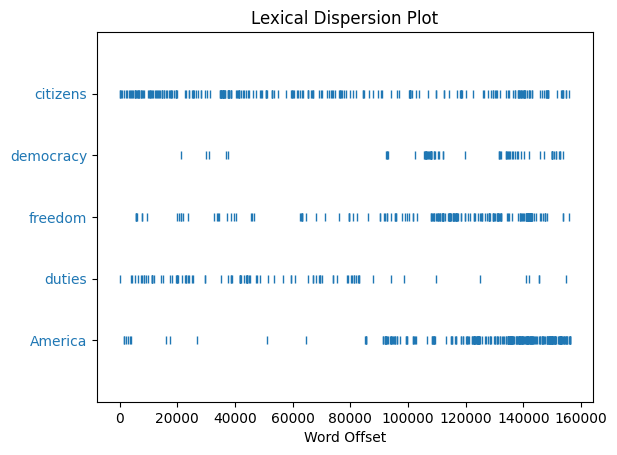

In [18]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

Mediante el uso de **"FreqDist"** podemos estudiar la frecuencia de las palabras, o incluso graficarlas. El gráfico nos muestra que a pesar de ser un texto corto, se cumple la ley de Zipf

In [19]:
fdist1 = FreqDist(text1) # este es un diccionario
#vocabulary1 = fdist1.keys()
fdist1['the']

13721

In [20]:
fdist1

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

In [21]:
#Qué sucede con los elementos del diccionario que generamos?
for key,value in fdist1.items():
    print(f"{key}:{value}")

[:3
Moby:84
Dick:84
by:1137
Herman:1
Melville:1
1851:3
]:1
ETYMOLOGY:1
.:6862
(:210
Supplied:2
a:4569
Late:1
Consumptive:1
Usher:2
to:4542
Grammar:2
School:1
):78
The:612
pale:18
--:1070
threadbare:1
in:3916
coat:28
,:18713
heart:90
body:110
and:6024
brain:37
;:4072
I:2124
see:253
him:1058
now:646
He:230
was:1632
ever:203
dusting:2
his:2459
old:436
lexicons:1
grammars:2
with:1659
queer:44
handkerchief:5
mockingly:1
embellished:3
all:1462
the:13721
gay:13
flags:1
of:6536
known:80
nations:12
world:173
loved:3
dust:10
it:2209
somehow:43
mildly:10
reminded:4
mortality:1
":1478
While:30
you:841
take:118
hand:205
school:9
others:37
teach:5
them:471
what:442
name:69
whale:906
-:2552
fish:133
is:1695
be:1030
called:116
our:199
tongue:11
leaving:38
out:529
through:227
ignorance:10
letter:12
H:2
which:640
almost:186
alone:37
maketh:5
signification:1
word:76
deliver:3
that:2982
not:1103
true:73
.":489
HACKLUYT:1
WHALE:38
...:11
Sw:1
Dan:4
HVAL:1
This:107
animal:16
named:11
from:1052
roundness:1
o

<Axes: xlabel='Samples', ylabel='Counts'>

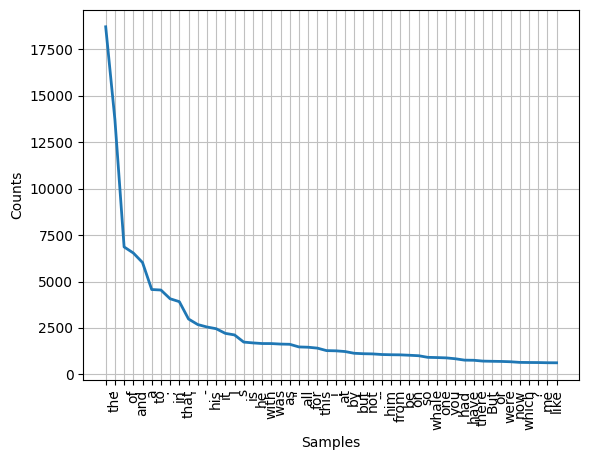

In [22]:
fdist1.plot(50)

Solo a modo de verificación, podemos hacer lo mismo para observar la ley de Heaps en el texto Moby Dick

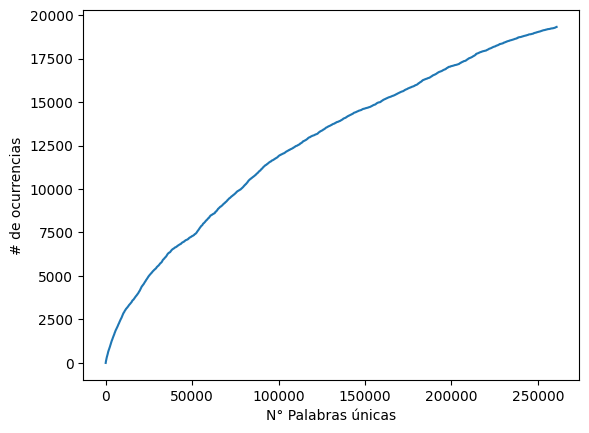

In [23]:
x = []
y = []

words = set()
for i, word in enumerate(text1.tokens):
    words.add(word)
    x.append(i+1)
    y.append(len(words))

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xlabel("N° Palabras únicas")
plt.ylabel("# de ocurrencias")
plt.show()


NLTK trae implementadas funcionalidades para dividir un string de texto en oraciones o en palabras. Incluso trae funcionalidades para tokenizar tweets.

In [24]:
nltk.download('punkt_tab') # Para poder trabajar con los tokenizers
from nltk.tokenize import sent_tokenize, TweetTokenizer
s = "this is a sentence. This is another sentence. Mr. President said something. U.S.A. means United States of America"
sent_tokenize(s)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['this is a sentence.',
 'This is another sentence.',
 'Mr. President said something.',
 'U.S.A. means United States of America']

In [25]:
s = "Esta es una oración. Esta es otra oración. El Sr. presidente dijo algo. U.S.A. significa United States of America"
sent_tokenize(s)

['Esta es una oración.',
 'Esta es otra oración.',
 'El Sr. presidente dijo algo.',
 'U.S.A. significa United States of America']

In [26]:
sentence = """Such an analysis can reveal features that are not easily visible from the variations in the individual genes"""
tokens = nltk.word_tokenize(sentence)
tokens

['Such',
 'an',
 'analysis',
 'can',
 'reveal',
 'features',
 'that',
 'are',
 'not',
 'easily',
 'visible',
 'from',
 'the',
 'variations',
 'in',
 'the',
 'individual',
 'genes']

In [27]:
tknzr = TweetTokenizer()
s = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tknzr.tokenize(s)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [28]:
tokens = nltk.word_tokenize(s)#No función bien
tokens

['This',
 'is',
 'a',
 'cooool',
 '#',
 'dummysmiley',
 ':',
 ':',
 '-',
 ')',
 ':',
 '-P',
 '<',
 '3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '-',
 '>',
 '<',
 '--']

NLTK además trae listados predefinidos de **stop-words** en diversos idiomas

In [29]:
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

Este listado lo podemos usar fácilmente para filtrar los stop-words de nuestro texto

In [30]:
stop_words = set(stopwords.words('spanish'))
text = 'Al eliminar palabras comunes, se reduce la cantidad de datos a procesar'
tokenized_text = nltk.word_tokenize(text.lower())
' '.join([s for s in tokenized_text if s not in stop_words])

'eliminar palabras comunes , reduce cantidad datos procesar'

Además trae funcionalidades implementadas para hacer **Stemming** y **Lematización**

In [31]:
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

text = "Artificial intelligence is intelligence demonstrated by machines. Leading AI textbooks define the field as the study of intelligent agents: any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals."

def lemmatize(lemmatizer, word):
  word = lemmatizer.lemmatize(word, pos='a')#lematiza si la palabra es adjetivo ('a')
  word = lemmatizer.lemmatize(word, pos='n')#lematiza si la palabra es un sustantivo ('n')
  word = lemmatizer.lemmatize(word, pos='v')#lematiza si la palabra es un verbo ('v')
  return word

print('Stemming usando método de Porter')
print(' '.join([porter.stem(s) for s in nltk.word_tokenize(text)]))
print('\nStemming usando método de Lancaster')
print(' '.join([lancaster.stem(s) for s in nltk.word_tokenize(text)]))
print('\nStemming usando método de Snowball')
print(' '.join([snowball.stem(s) for s in nltk.word_tokenize(text)]))
print('\nLematización usando método de WordNet')
print(' '.join([lemmatize(lemmatizer, s) for s in nltk.word_tokenize(text)]))

Stemming usando método de Porter
artifici intellig is intellig demonstr by machin . lead ai textbook defin the field as the studi of intellig agent : ani devic that perceiv it environ and take action that maxim it chanc of success achiev it goal .

Stemming usando método de Lancaster
art intellig is intellig demonst by machin . lead ai textbook defin the field as the study of intellig ag : any dev that perceiv it environ and tak act that maxim it chant of success achiev it goal .

Stemming usando método de Snowball
artifici intellig is intellig demonstr by machin . lead ai textbook defin the field as the studi of intellig agent : ani devic that perceiv it environ and take action that maxim it chanc of success achiev it goal .

Lematización usando método de WordNet
Artificial intelligence be intelligence demonstrate by machine . Leading AI textbook define the field a the study of intelligent agent : any device that perceive it environment and take action that maximize it chance of succe

### **B) Uso de spaCy**

In [32]:
!pip install spacy --quiet
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 83.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [33]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

**Reconocimiento de entidades nombradas (NER):**

In [34]:
import spacy
from spacy import displacy

text = "Simón Bolivar :-) murió en el año 1830 en Argentina y la O.N.U. le dió un premio "

nlp = spacy.load("es_core_news_sm")
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

Simón Bolivar 0 13 PER
Argentina 42 51 LOC
O.N.U. 57 63 ORG


SpaCy tambien trae funcionalidades para dividir texto en oraciones y oraciones en palabras. Dependiendo del tipo de datos que tengas, podría ser que funcione mejor o peor que NLTK, aunque en la mayoría de los casos debería ser equivalente. (Recomendación: si el dominio de mis datos es muy exótico, probar con ambos. Sino usar el que les acomode más)

In [35]:
import spacy
from spacy.lang.en import English

nlp = English()
nlp.add_pipe("sentencizer")
doc = nlp("this is a sentence. This is another sentence. Mr. President said something. U.S.A. means United States of America")
for sent in doc.sents:
    print(sent.text)

this is a sentence.
This is another sentence.
Mr. President said something.
U.S.A. means United States of America


In [36]:
for sent in doc.sents:
  for token in sent:
    print(token.text)
  break # solo imprimamos la primera oracion

this
is
a
sentence
.


In [37]:
from spacy.lang.es import Spanish

nlp = Spanish()
nlp.add_pipe("sentencizer")
doc = nlp("Esta es una oración. Esta es otra oración. El Sr. presidente dijo algo. U.S.A. significa United States of America")
for sent in doc.sents:
    print(sent.text)

Esta es una oración.
Esta es otra oración.
El Sr. presidente dijo algo.
U.S.A. significa United States of America


In [38]:
for sent in doc.sents:
  for token in sent:
    print(token.text)
  break # solo imprimamos la primera oracion

Esta
es
una
oración
.


Para extrar más información con esta librería: [enlace](https://www.kaggle.com/code/samarthagarwal23/information-extraction-from-spacy)

## **Actividades**

**Actividad 1: Separación de tweets en frases**

Asuma que tiene un problema donde debe analizar mensajes de twitter en inglés.
**¿Cuál de las siguientes implementaciones le parece más adecuada para separar el texto en sus distintas frases?**

NOTA: Asuma que todas las librerías necesarias se encuentran previamente cargadas y que todos los métodos se logran ejecutar sin errores

NOTA 2: En caso de haber más de una correcta, debe seleccionar la más adecuada dado el enunciado y lo aprendido en clases.

In [ ]:
import re
import nltk
from nltk.tokenize import sent_tokenize, TweetTokenizer

# OPCIÓN 1
def split_text1(text):
    # separemos el texto según la aparición del caracter "."
    return text.split('.')

# OPCIÓN 2
def split_text2(text):
    # separamos el texto según ".", ";" o salto de línea
    return re.split('[.;\\n]', text)

# OPCIÓN 3
def split_text3(text):
  # separamos el texto según espacios, tabs o saltos de línea
  return text.split()

# OPCIÓN 4
def split_text4(text):
  # usamos NLTK de esta forma
  return nltk.word_tokenize(text)

# OPCIÓN 5
def split_text5(text):
  # usamos NLTK de esta forma
  return nltk.sent_tokenize(text)

# OPCIÓN 6
def split_text6(text):
  # usamos NLTK de esta forma
  tokenizer = TweetTokenizer()
  return tokenizer.tokenize(text)

In [ ]:
#@title Respuesta Actividad 1

Mejor Opción = 'Opcion 5' #@param ["seleccione una opcion", "Opcion 1", "Opcion 2", "Opcion 3", "Opcion 4", "Opcion 5", "Opcion 6"]

**Actividad 2: Separación de texto en palabras**

Asuma que tiene un problema donde debe analizar correos electrónicos corporativos en formato texto. Asuma que los textos están en español y en lenguaje formal. ¿Cuál de las siguientes implementaciones le parece más adecuada para separar el texto en sus distintos tokens? Asuma que este resultado intermedio luego será utilizado para eliminarle los stop-words.

NOTA: Asuma que todas las librerías necesarias se encuentran previamente cargadas y que todos los métodos se logran ejecutar sin errores

NOTA 2: En caso de haber mas de una correcta, debe seleccionar la más adecuada dado el enunciado y lo aprendido en clases

In [ ]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from spacy.lang.en import Spanish

# OPCIÓN 1
def split_text1(text):
    # separemos el texto según la aparición del caracter " "
    return text.split(' ')

# OPCIÓN 2
def split_text2(text):
  # separamos el texto según espacios, tabs o saltos de línea
  return text.split()

# OPCIÓN 3
def split_text3(text):
    # separamos el texto según ".", ";", ",", " " o salto de línea
    return re.split('[.;, \\n]', text)

# OPCIÓN 4
def split_text4(text):
  # usamos NLTK de esta forma
  return nltk.word_tokenize(text)

# OPCIÓN 5
def split_text5(text):
  # usamos Spacy de esta forma
  nlp = Spanish()
  nlp.add_pipe("sentencizer")
  doc = nlp(text)
  result = []
  for sent in doc.sents:
      result.append(sent.text)
  return result

# OPCIÓN 6
def split_text6(text):
  # usamos NLTK de esta forma
  tokenizer = TweetTokenizer()
  return tokenizer.tokenize(text)

In [ ]:
#@title Respuesta Actividad 2

Mejor Opción = 'Opcion 4' #@param ["seleccione una opcion", "Opcion 1", "Opcion 2", "Opcion 3", "Opcion 4", "Opcion 5", "Opcion 6"]

**Actividad 3: Eliminación de Stop-Words**

Asuma que tiene un problema donde debe analizar artículos de wikipedia en español. ¿Cuál de las siguientes implementaciones le parece más adecuada para eliminar los stop-words?

Asuma que recibe un corpus de texto de entrenamiento llamado "train" (1.000.000 de artículos de wikipedia) y otro de test llamado "test" (200.000 artículos de wikipedia), además de un umbral de frecuencia definido por el usuario (excepto en los últimos 2 casos).

Asuma además que tanto "train" como "test" se encuentran en formato "list" resultantes de un proceso de tokenización de palabras.

NOTA: Asuma que todas las librerías necesarias se encuentran previamente cargadas y que todos los métodos se logran ejecutar sin errores

NOTA 2: En caso de haber mas de una correcta, debe seleccionar la más adecuada dado el enunciado y lo aprendido en clases

In [ ]:
# OPCIÓN 1
def remove_stopwords1(train, test, threshold):
    corpus = nltk.Text(train+test) # Ojo aquí
    frequencies = FreqDist(corpus)
    stop_words = set()
    for word in frequencies.keys():
        if frequencies[word] > threshold: # Ojo aquí
            stop_words.add(word)
    filtered_train = [s for s in train if s not in stop_words] # Ojo aquí
    filtered_test = [s for s in test if s not in stop_words] # Ojo aquí
    return filtered_train, filtered_test

# OPCIÓN 2
def remove_stopwords2(train, test, threshold):
    corpus = nltk.Text(train+test) # Ojo aquí
    frequencies = FreqDist(corpus)
    stop_words = set()
    for word in frequencies.keys():
        if frequencies[word] > threshold: # Ojo aquí
            stop_words.add(word)
    filtered_train = [s for s in train if s in stop_words] # Ojo aquí
    filtered_test = [s for s in test if s in stop_words] # Ojo aquí
    return filtered_train, filtered_test

# OPCIÓN 3
def remove_stopwords3(train, test, threshold):
    corpus = nltk.Text(train+test) # Ojo aquí
    frequencies = FreqDist(corpus)
    stop_words = set()
    for word in frequencies.keys():
        if frequencies[word] < threshold: # Ojo aquí
            stop_words.add(word)
    filtered_train = [s for s in train if s not in stop_words] # Ojo aquí
    filtered_test = [s for s in test if s not in stop_words] # Ojo aquí
    return filtered_train, filtered_test

# OPCIÓN 4
def remove_stopwords4(train, test, threshold):
    corpus = nltk.Text(train) # Ojo aquí
    frequencies = FreqDist(corpus)
    stop_words = set()
    for word in frequencies.keys():
        if frequencies[word] < threshold: # Ojo aquí
            stop_words.add(word)
    filtered_train = [s for s in train if s not in stop_words] # Ojo aquí
    filtered_test = [s for s in test if s not in stop_words] # Ojo aquí
    return filtered_train, filtered_test

# OPCIÓN 5
def remove_stopwords5(train, test, threshold):
    corpus = nltk.Text(train) # Ojo aquí
    frequencies = FreqDist(corpus)
    stop_words = set()
    for word in frequencies.keys():
        if frequencies[word] > threshold: # Ojo aquí
            stop_words.add(word)
    filtered_train = [s for s in train if s not in stop_words] # Ojo aquí
    filtered_test = [s for s in test if s not in stop_words] # Ojo aquí
    return filtered_train, filtered_test

# OPCIÓN 6
def remove_stopwords6(train, test, threshold):
    train_corpus = nltk.Text(train)
    test_corpus = nltk.Text(test)
    frequencies_train = FreqDist(train_corpus) # Ojo aquí
    frequencies_test = FreqDist(test_corpus) # Ojo aquí
    stop_words_train = set()
    stop_words_test = set()
    for word in frequencies_train.keys():
        if frequencies_train[word] < threshold: # Ojo aquí
            stop_words_train.add(word)
    for word in frequencies_test.keys():
        if frequencies_test[word] < threshold: # Ojo aquí
            stop_words_test.add(word)
    filtered_train = [s for s in train if s not in stop_words_train] # Ojo aquí
    filtered_test = [s for s in test if s not in stop_words_test] # Ojo aquí
    return filtered_train, filtered_test

# OPCIÓN 7
def remove_stopwords7(train, test, threshold):
    train_corpus = nltk.Text(train)
    test_corpus = nltk.Text(test)
    frequencies_train = FreqDist(train_corpus) # Ojo aquí
    frequencies_test = FreqDist(test_corpus) # Ojo aquí
    stop_words_train = set()
    stop_words_test = set()
    for word in frequencies_train.keys():
        if frequencies_train[word] > threshold: # Ojo aquí
            stop_words_train.add(word)
    for word in frequencies_test.keys():
        if frequencies_test[word] > threshold: # Ojo aquí
            stop_words_test.add(word)
    filtered_train = [s for s in train if s not in stop_words_train] # Ojo aquí
    filtered_test = [s for s in test if s not in stop_words_test] # Ojo aquí
    return filtered_train, filtered_test

# OPCIÓN 8
def remove_stopwords8(train, test, threshold):
    train_corpus = nltk.Text(train)
    test_corpus = nltk.Text(test)
    frequencies_train = FreqDist(train_corpus) # Ojo aquí
    frequencies_test = FreqDist(test_corpus) # Ojo aquí
    stop_words_train = set()
    stop_words_test = set()
    for word in frequencies_train.keys():
        if frequencies_train[word] > threshold: # Ojo aquí
            stop_words_train.add(word)
    for word in frequencies_test.keys():
        if frequencies_test[word] > threshold: # Ojo aquí
            stop_words_test.add(word)
    filtered_train = [s for s in train if s in stop_words_train] # Ojo aquí
    filtered_test = [s for s in test if s in stop_words_test] # Ojo aquí
    return filtered_train, filtered_test

# OPCIÓN 9
def remove_stopwords9(train, test):
    stop_words = set(stopwords.words('english')) # Ojo aquí
    filtered_train = [s for s in train if s not in stop_words] # Ojo aquí
    filtered_test = [s for s in test if s not in stop_words] # Ojo aquí
    return filtered_train, filtered_test

# OPCIÓN 10
def remove_stopwords10(train, test):
    stop_words = set(stopwords.words('english')) # Ojo aquí
    filtered_train = [s for s in train if s in stop_words] # Ojo aquí
    filtered_test = [s for s in test if s in stop_words] # Ojo aquí
    return filtered_train, filtered_test

In [ ]:
#@title Respuesta Actividad 3

Mejor Opción = 'Opcion 2' #@param ["seleccione una opcion", "Opcion 1", "Opcion 2", "Opcion 3", "Opcion 4", "Opcion 5", "Opcion 6", "Opcion 7", "Opcion 8", "Opcion 9", "Opcion 10"]

## **2. Fuentes de texto y visualización**

In [41]:
#Imports necesarios
import pandas as pd
import matplotlib.pyplot as plt
import re
#!pip install wordcloud --quiet # en caso de ser necesario y su IDE no lo detecta
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### **A) Archivos con texto etiquetado**

In [42]:
import pandas as pd
# URL directa a un archivo CSV del dataset de reseñas de películas de IMDB. Acá más datasets: https://www.geeksforgeeks.org/nlp/dataset-for-sentiment-analysis/
# Este dataset es un estándar para tareas de clasificación binaria de sentimiento.
# Contiene 50,000 reseñas, divididas equitativamente en etiquetas 'positive' y 'negative'.
url_dataset = 'https://media.geeksforgeeks.org/wp-content/uploads/20240514105101/IMDB-Dataset.csv'

print("Descargando el dataset de reseñas de IMDB...")

# Utilizamos pd.read_csv para cargar los datos directamente desde la URL.
try:
    df = pd.read_csv(url_dataset)
    print("Datos descargados y cargados con éxito.")
except Exception as e:
    print(f"Error al descargar o cargar los datos: {e}")
    exit()

# La estructura de este dataset es simple:
# - 'review': El texto de la reseña de la película.
# - 'sentiment': La etiqueta, que puede ser 'positive' o 'negative'.

Descargando el dataset de reseñas de IMDB...
Datos descargados y cargados con éxito.


In [43]:
# Usamos una expresión regular para encontrar y reemplazar cualquier etiqueta HTML por un espacio.
# r'<.*?>' es el patrón que busca cualquier cosa que empiece con '<' y termine con '>'.
df['review'] = df['review'].str.replace(r'<.*?>', ' ', regex=True)

In [44]:
print('Total data:',df.shape)
df.sample(5) #ver un ejemplo del contenido del dataset

Total data: (50000, 2)


,review,sentiment
28029,First the easy part: this movie is pretentious...,negative
35217,"""The Cat's Meow"" contains a few scenes that bo...",negative
18568,You've got to be kidding. This movie sucked fo...,negative
5390,"I can't knock this film too terribly, because ...",negative
37015,An Epic Story of Hope constrained by budget an...,negative


In [45]:
# Eliminar duplicados y resetear
df = df.drop_duplicates(keep="first")
df_reidx = df.reset_index(drop=True)
df_reidx.shape

(49582, 2)

In [46]:
#Plot de etiquetas
df_reidx['sentiment'].value_counts()

,count
sentiment,
positive,24884
negative,24698


(Opcional) recortamos el dataset original para poder procesar más rápido los datos:

In [47]:
n_samples_per_class = 500 # Queremos 500 positivas y 500 negativas

# Realizar el muestreo estratificado
#    - Se crea una lista de DataFrames, donde cada uno es una muestra de una categoría.
#    - Luego se concatenan para formar el dataset final.
#    - Este método evita advertencias y es muy claro y robusto.
sampled_dfs = [group.sample(n=n_samples_per_class, random_state=42) for name, group in df_reidx.groupby('sentiment')]
df_balanced_small = pd.concat(sampled_dfs)


# Verificamos el resultado
print("\nForma total del nuevo dataset:", df_balanced_small.shape)

# Mostramos un ejemplo del nuevo dataset
print('\nEjemplo de 5 filas aleatorias del nuevo dataset:')
display(df_balanced_small.sample(5))

# Verificamos la nueva distribución de etiquetas
print('\nNueva distribución de las etiquetas de sentimiento:')
display(df_balanced_small['sentiment'].value_counts())


Forma total del nuevo dataset: (1000, 2)

Ejemplo de 5 filas aleatorias del nuevo dataset:


,review,sentiment
45286,ALMOST GOLDEN: THE JESSICA SAVITCH STORY Aspe...,negative
41730,Although I brought this film by accident (I th...,positive
46222,Don't even ask me why I watched this! The only...,negative
20497,A friend once told me that an art-house indepe...,negative
1032,I can't really see how anyone can have any int...,negative



Nueva distribución de las etiquetas de sentimiento:


,count
sentiment,
negative,500
positive,500


In [48]:
#crear objeto para lemmatization
lm = WordNetLemmatizer()

In [49]:
#Preprocessing
sw = stopwords.words('english')
def text_transformation(df_col,swords):
    corpus = []
    for item in df_col:
        #usando expresión regular eliminar cualquier caracter que no pertenezca al alfabeto
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        #convertir a minuscula
        new_item = new_item.lower()
        new_item = new_item.split()
        #buscar stopwords y eliminarlas y luego lematizar cada palabra, es decir, cambiar las diferentes formas de una palabra en un solo elemento
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(swords)]#modificar según el idioma
        corpus.append(' '.join(str(x) for x in new_item))
   #devolver un corpus de los datos procesados
    return corpus

In [50]:
#llamar a la función del preprocessing, pasarle el texto y guardarlo en corpus
corpus = text_transformation(df_balanced_small['review'],sw)#puede demorar, paciencia!

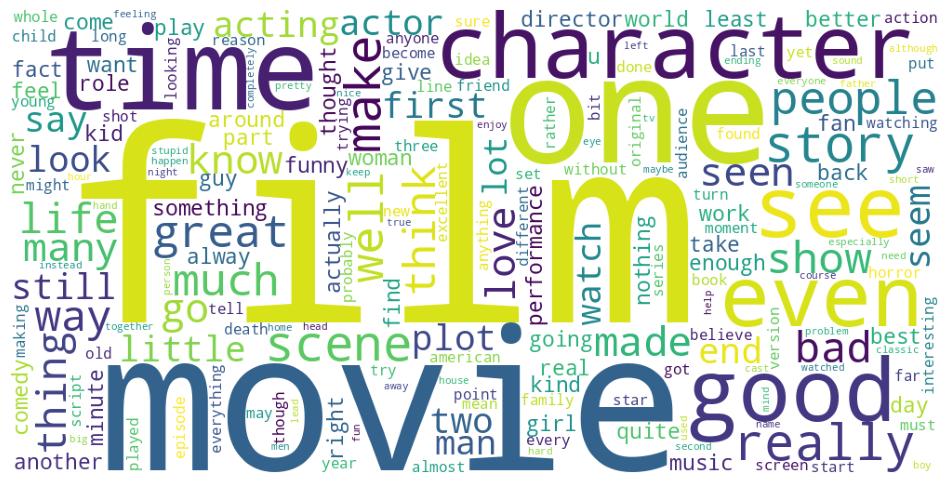

In [51]:
#Crear wordcloud para visualizar las palabras más frecuentes
plt.figure(figsize=(12, 8))
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### **B) Archivos con texto simple**

Por supuesto, lo anterior se realizó a partir de un texto cargado desde un archivo .csv y preprocesado, pero si ya tienen su texto más o menos limpio, pueden realizarlo igualmente de manera más rápida:

In [58]:
texto_quijote = """
En un lugar de la Mancha, de cuyo nombre no quiero acordarme,
no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero,
adarga antigua, rocín flaco y galgo corredor. Una olla de algo más vaca que carnero,
salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes,
algún palomino de añadidura los domingos, consumían las tres partes de su hacienda.
El resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mesmo,
los días de entre semana se honraba con su vellorí de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta,
y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera.
Frisaba la edad de nuestro hidalgo con los cincuenta años, era de complexión recia, seco de carnes, enjuto de rostro;
gran madrugador y amigo de la caza. Quieren decir que tenía el sobrenombre de Quijada o Quesada
(que en esto hay alguna diferencia en los autores que deste caso escriben),
aunque por conjeturas verosímiles se deja entender que se llama Quijana.
Pero esto importa poco a nuestro cuento; basta que en la narración dél no se salga un punto de la verdad.
"""
# Pre-procesamiento
stop_words_es = set(stopwords.words('spanish'))
# Añadimos palabras que no aportan mucho en este contexto específico
stop_words_es.update(['tan', 'ser', 'así', 'ver', 'mil', 'pues', 'tal'])
texto_quijote = texto_quijote.lower()
texto_quijote = re.sub(r'[^a-záéíóúñ\s]', '', texto_quijote)
tokens = word_tokenize(texto_quijote.lower())

#tokens = [lm.lemmatize(palabra) for palabra in tokens if palabra not in stop_words_es and len(palabra) > 2]#cambiará mucho sin letamizar?
tokens = [palabra for palabra in tokens if palabra not in stop_words_es and len(palabra) > 2]
corpus_quijote=' '.join(str(x) for x in tokens)

In [53]:
corpus_quijote

'lugar mancha cuyo nombre quiero acordarme tiempo vivía hidalgo lanza astillero adarga antigua rocín flaco galgo corredor olla vaca carnero salpicón noches duelos quebrantos sábados lantejas viernes algún palomino añadidura domingos consumían tres partes hacienda resto della concluían sayo velarte calzas velludo fiestas pantuflos mesmo días semana honraba vellorí fino casa ama pasaba cuarenta sobrina llegaba veinte mozo campo plaza ensillaba rocín tomaba podadera frisaba edad hidalgo cincuenta años complexión recia seco carnes enjuto rostro gran madrugador amigo caza quieren decir sobrenombre quijada quesada alguna diferencia autores deste caso escriben aunque conjeturas verosímiles deja entender llama quijana importa cuento basta narración dél salga punto verdad'

Visualizamos

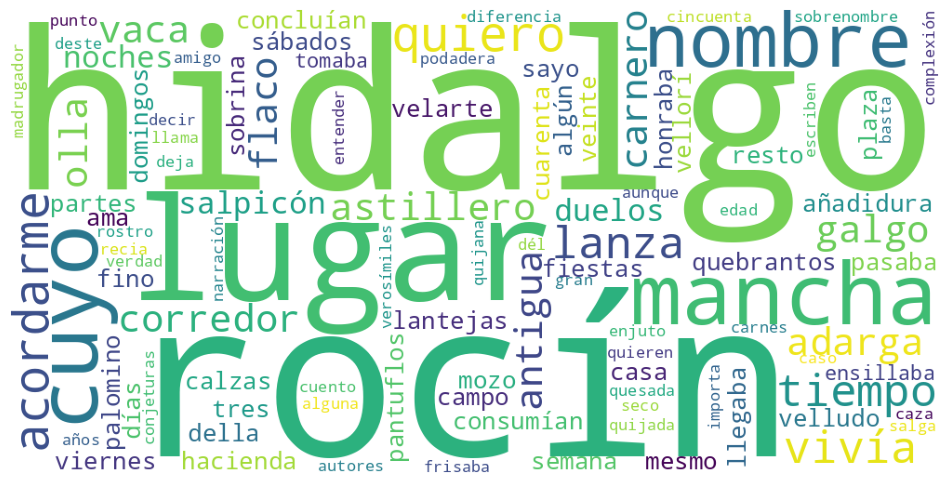

In [54]:
#Crear wordcloud para visualizar las palabras más frecuentes
plt.figure(figsize=(12, 8))
word_cloud = ""
for row in corpus_quijote:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Actividad 4:**

Buscar un texto en inglés y generar una nube de palabras. Realizar el preprocesamiento necesario.

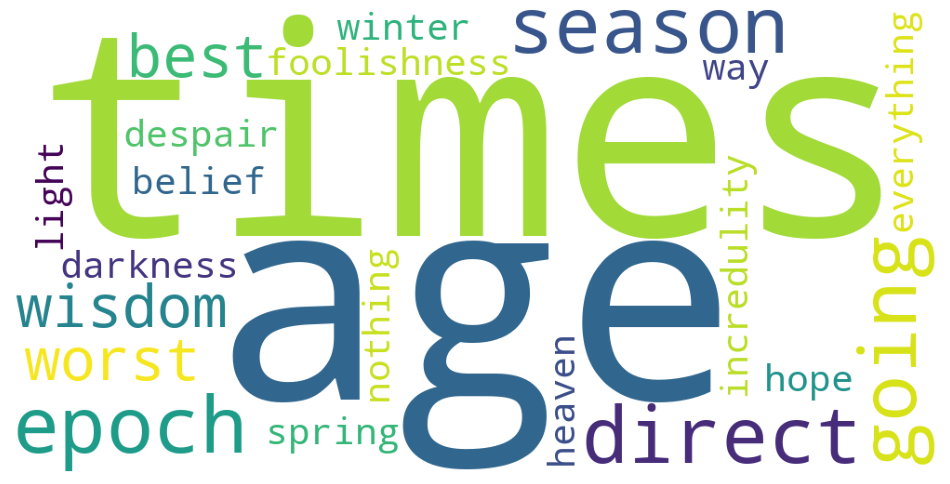

In [61]:
# SU CODIGO AQUÍ

texto_ingles = """
It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair.
We had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going direct the other way.
"""
# Pre-procesamiento
stop_words_en = set(stopwords.words('english'))
# Añadimos palabras que no aportan mucho en este contexto específico
stop_words_en.update(['it', 'was', 'the', 'of', 'we', 'had', 'were'])
texto_ingles = texto_ingles.lower()
texto_ingles = re.sub(r'[^a-záéíóúñ\s]', '', texto_ingles)
tokens = word_tokenize(texto_ingles.lower())

#tokens = [lm.lemmatize(palabra) for palabra in tokens if palabra not in stop_words_es and len(palabra) > 2]#cambiará mucho sin letamizar?
tokens = [palabra for palabra in tokens if palabra not in stop_words_es and len(palabra) > 2]
corpus_ingles=' '.join(str(x) for x in tokens)

#Crear wordcloud para visualizar las palabras más frecuentes
plt.figure(figsize=(12, 8))
word_cloud = ""
for row in corpus_ingles:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Actividad 5**

Usando matplotlib, generar un gráfico de barras en orden decreciente de las 10 palabras más comunes de un texto en español que usted seleccione. Considere el preprocesamiento necesario.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


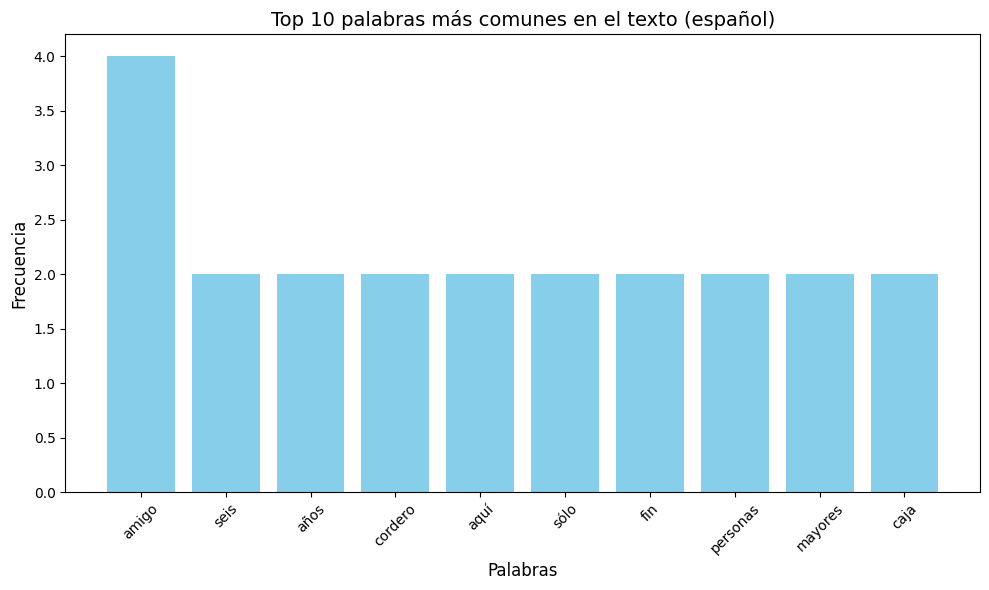

In [64]:
# SU CODIGO AQUÍ

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter

# Descargar recursos (solo la primera vez)
nltk.download('punkt')
nltk.download('stopwords')

texto_principito = """
Porque no me gusta que mi libro sea tomado a la ligera. Siento tanta pena
al contar estos recuerdos. Hace ya seis años que mi amigo se fue con su
cordero. Y si intento describirlo aquí es sólo con el fin de no olvidarlo. Es muy
triste olvidar a un amigo. No todos han tenido un amigo. Y yo puedo llegar a
ser como las personas mayores, que sólo se interesan por las cifras. Para evitar
esto he comprado una caja de lápices de colores. ¡Es muy duro, a mi edad,
ponerse a aprender a dibujar, cuando en toda la vida no se ha hecho otra
tentativa que la de una boa abierta y una boa cerrada a la edad de seis años!
Ciertamente que yo trataré de hacer retratos lo más parecido posibles, pero no
estoy muy seguro de lograrlo. Uno saldrá bien y otro no tiene parecido alguno.
En las proporciones me equivoco también un poco. Aquí el principito es
demasiado grande y allá es demasiado pequeño. Dudo también sobre el color
de su traje. Titubeo sobre esto y lo otro y unas veces sale bien y otras mal. Es
posible, en fin, que me equivoque sobre ciertos detalles muy importantes. Pero
habrá que perdonármelo ya que mi amigo no me daba nunca muchas
explicaciones. Me creía semejante a sí mismo y yo, desgraciadamente, no sé
ver un cordero a través de una caja. Es posible que yo sea un poco como las
personas mayores.
He debido envejecer.
"""
# Pre-procesamiento
stop_words_es = set(stopwords.words('spanish'))
# Añadimos palabras que no aportan mucho en este contexto específico
stop_words_es.update(['tan', 'ser', 'así', 'ver', 'mil', 'pues', 'tal'])
texto_principito = texto_principito.lower()
texto_principito = re.sub(r'[^a-záéíóúñ\s]', '', texto_principito)
tokens = word_tokenize(texto_principito.lower())

#tokens = [lm.lemmatize(palabra) for palabra in tokens if palabra not in stop_words_es and len(palabra) > 2]#cambiará mucho sin letamizar?
tokens = [palabra for palabra in tokens if palabra not in stop_words_es and len(palabra) > 2]
corpus_quijote=' '.join(str(x) for x in tokens)

#Contar frecuencia
contador = Counter(tokens)
palabras_comunes = contador.most_common(10)

#Separar palabras y frecuencias
palabras, frecuencias = zip(*palabras_comunes)

#Graficar
plt.figure(figsize=(10, 6))
plt.bar(palabras, frecuencias, color='skyblue')
plt.title("Top 10 palabras más comunes en el texto (español)", fontsize=14)
plt.xlabel("Palabras", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()